In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd

# Path to your CSV file in Google Drive
file_path_AccidentReports = "/content/drive/My Drive/output.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = pd.read_csv(file_path_AccidentReports)

In [ ]:
X = X[X['Year'] >= 2020]

In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
y = X

In [ ]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_Junction_Control = LabelEncoder()
X['Junction_Control'] = le_Junction_Control.fit_transform(X['Junction_Control'])

le_Accident_Spot = LabelEncoder()
X['Accident_Spot'] = le_Accident_Spot.fit_transform(X['Accident_Spot'])

le_Road_Type = LabelEncoder()
X['Road_Type'] = le_Road_Type.fit_transform(X['Road_Type'])

le_Severity = LabelEncoder()
X['Severity'] = le_Severity.fit_transform(X['Severity'])

le_Road_Character = LabelEncoder()
X['Road_Character'] = le_Road_Character.fit_transform(X['Severity'])

le_Weather = LabelEncoder()
X['Weather'] = le_Weather.fit_transform(X['Weather'])

le_Road_Condition = LabelEncoder()
X['Road_Condition'] = le_Road_Condition.fit_transform(X['Road_Condition'])

In [ ]:
X = X.drop(['Latitude', 'Longitude', 'age', 'PersonType', 'Sex', 'Surface_Type', 'Year'], axis=1)

In [ ]:
X = X.sample(10000)


In [ ]:
# #feature scaling(Standard Scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(X_scaled)

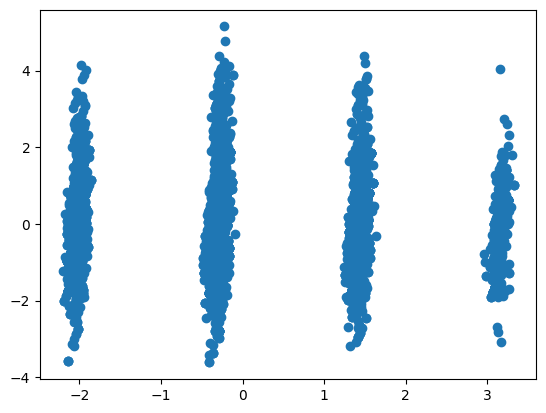

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(pca_scaled[:, 0],pca_scaled[:,1])

In [ ]:
## Agglomerative Clustering
## To construct a dendogram
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")
## create dendogram
sc.dendrogram(sc.linkage (pca_scaled, method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [ ]:
# Using fcluster to assign cluster labels based on a threshold
import scipy.cluster.hierarchy as sch

threshold = 100
labels = sch.fcluster(sch.linkage(X_scaled, method='ward'), threshold, criterion='distance')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='single')
cluster.fit(pca_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=4)

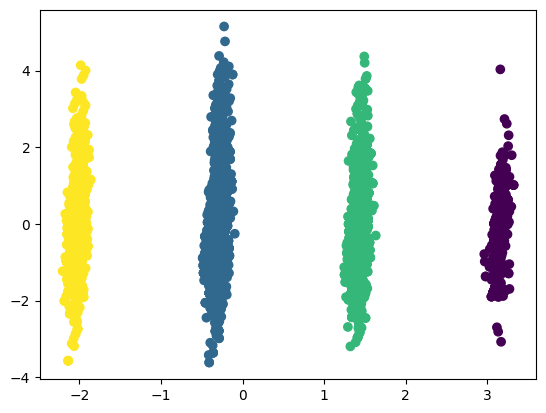

In [ ]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [ ]:
# from sklearn.metrics import silhouette_score
# silhouette_coefficients = []
# for k in range(2, 100):
#   agglo = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
#   agglo.fit(X_scaled)
#   score=silhouette_score (X_scaled, agglo.labels_)
#   silhouette_coefficients.append(score)



In [ ]:
# ## plotting silhouette score
# plt.plot(range(2,100), silhouette_coefficients)
# plt.xticks(range(2,100))
# plt.xlabel("Number of Cluters")
# plt.ylabel("Silhoutte Coeffecient")
# plt.show()

In [ ]:
import numpy as np
pca_transformed_data = pca.transform(X_scaled)
cluster_labels = cluster.labels_

cluster_centroids_pca = []
cluster_centroids_original = []
cluster_centroids_unscaled = []

for label in np.unique(cluster_labels):
    cluster_points = pca_transformed_data[cluster_labels == label]
    cluster_centroid = np.mean(cluster_points, axis=0)
    cluster_centroids_pca.append(cluster_centroid)

    cluster_centroid_original = pca.inverse_transform(cluster_centroid.reshape(1, -1))
    cluster_centroids_original.append(cluster_centroid_original[0])

    cluster_centroid_unscaled = scaler.inverse_transform(cluster_centroid_original.reshape(1, -1))
    cluster_centroids_unscaled.append(cluster_centroid_unscaled[0])

In [ ]:
cluster_centroids_unscaled

[array([4.19661119e+00, 3.40090022e-03, 4.63603961e-01, 3.40090022e-03,
        9.03596229e+00, 1.20864460e+00, 1.44038528e-01]),
 array([4.09815732, 2.0004485 , 0.46076957, 2.0004485 , 9.54377314,
        1.23289075, 0.22549324]),
 array([4.16526704, 1.00014824, 0.48216273, 1.00014824, 9.41056502,
        1.25240966, 0.21486305]),
 array([4.01158911, 2.99807466, 0.41739192, 2.99807466, 9.5429312 ,
        1.17848172, 0.20280135])]

In [ ]:
import numpy as np
encoders = [le_Accident_Spot, le_Severity, le_Junction_Control, le_Road_Character, le_Road_Type, le_Road_Condition, le_Weather]

decoded_data = []
for encoded_values in cluster_centroids_unscaled:
    decoded_values = []
    for i, encoder in enumerate(encoders):
        if(encoder == le_Road_Character):
          val = int(np.round(encoded_values[i])/3)
        else:
          val = int(np.round(encoded_values[i]))
          decoded = encoder.inverse_transform([val])
          decoded_values.append(decoded[0])
    decoded_data.append(decoded_values)

print(decoded_data)


[['Junction', 'Damage Only', 'Controlled', 'One way', 'Engineering Defect of Road', 'Clear'], ['Junction', 'Grievous Injury', 'Controlled', 'Residential Street', 'Engineering Defect of Road', 'Clear'], ['Junction', 'Fatal', 'Controlled', 'One way', 'Engineering Defect of Road', 'Clear'], ['Junction', 'Simple Injury', 'Controlled', 'Residential Street', 'Engineering Defect of Road', 'Clear']]


In [ ]:
X

,Year,Accident_Spot,Severity,Junction_Control,Road_Character,Road_Type,Surface_Type,Road_Condition,Weather,Latitude,Longitude,age,Sex,PersonType
0,2016,Bottleneck,Grievous Injury,Controlled,Curve,State Highway,Bitumen(Tar),Construction Work / Material,Clear,16.18673,75.69614,60.0,FEMALE,Injured
1,2016,Bottleneck,Grievous Injury,Controlled,Curve,State Highway,Bitumen(Tar),Pot holed,Clear,16.18673,75.69614,42.0,MALE,Injured
2,2016,Bridge,Fatal,Controlled,Straight and flat,State Highway,Bitumen(Tar),Pot holed,Rain,16.18673,75.69614,21.0,MALE,Injured
3,2016,Bridge,Fatal,Controlled,Curve,State Highway,Bitumen(Tar),Pot holed,Rain,16.18673,75.69614,23.0,MALE,Injured
4,2016,Bridge,Fatal,Uncontrolled,Straight and flat,State Highway,Bitumen(Tar),Pot holed,Rain,16.18673,75.69614,30.0,MALE,Injured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484822,2023,Junction,Grievous Injury,Uncontrolled,Curve,Minor District Road,Bitumen(Tar),Engineering Defect of Road,Clear,16.73000,76.94000,18.0,MALE,Injured
484823,2023,Junction,Grievous Injury,Uncontrolled,Curve,Minor District Road,Bitumen(Tar),Construction Work / Material,Clear,16.73000,76.94000,18.0,MALE,Injured
484824,2023,Junction,Fatal,Uncontrolled,Straight and flat,NH,Bitumen(Tar),Pot holed,Clear,16.73000,76.94000,35.0,MALE,Deceased
484825,2023,Junction,Grievous Injury,Uncontrolled,Curve,NH,Bitumen(Tar),Construction Work / Material,Clear,16.73000,76.94000,70.0,MALE,Injured
